In [ ]:
# From Tutorial: https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import keras

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [3]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [4]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [9]:
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 135us/step - loss: 0.3621 - val_loss: 0.2717
Epoch 2/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.2644 - val_loss: 0.2532
Epoch 3/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.2421 - val_loss: 0.2292
Epoch 4/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.2214 - val_loss: 0.2118
Epoch 5/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.2072 - val_loss: 0.2000
Epoch 6/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.1968 - val_loss: 0.1908
Epoch 7/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1887 - val_loss: 0.1836
Epoch 8/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1822 - val_loss: 0.1776
Epoch 9/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.1765 - val_lo

60000/60000 [==============================] - 6s 95us/step - loss: 0.0997 - val_loss: 0.0981
Epoch 77/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.0996 - val_loss: 0.0980
Epoch 78/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.0995 - val_loss: 0.0979
Epoch 79/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.0995 - val_loss: 0.0978
Epoch 80/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.0994 - val_loss: 0.0977
Epoch 81/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.0993 - val_loss: 0.0977
Epoch 82/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.0992 - val_loss: 0.0976
Epoch 83/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.0992 - val_loss: 0.0975
Epoch 84/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.0991 - val_loss: 0.0975
Epoch 85/100
60000/60000 [========================

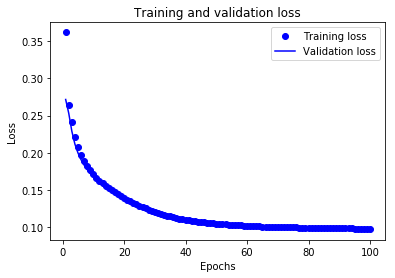

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 101)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

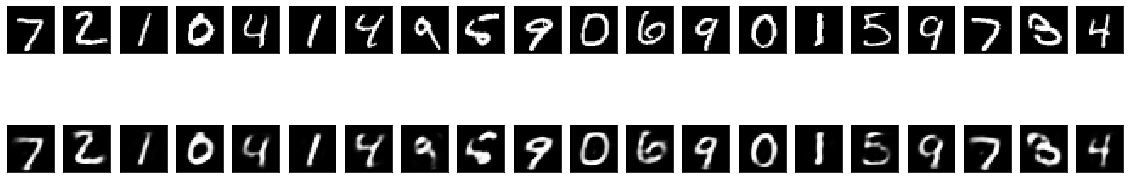

In [13]:
n = 20  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()